In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=816623f54baae79d6aad1b16bbe3f882


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuura
Processing Record 2 of Set 1 | hofn
Processing Record 3 of Set 1 | kirakira
Processing Record 4 of Set 1 | iquitos
Processing Record 5 of Set 1 | marstal
Processing Record 6 of Set 1 | havre-saint-pierre
Processing Record 7 of Set 1 | trincomalee
Processing Record 8 of Set 1 | mosquera
Processing Record 9 of Set 1 | paita
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | beroroha
Processing Record 12 of Set 1 | nemuro
Processing Record 13 of Set 1 | concepcion
Processing Record 14 of Set 1 | yuzawa
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | lompoc
Processing Record 18 of Set 1 | guiratinga
Processing Record 19 of Set 1 | salinopolis
Processing Record 20 of Set 1 | pemangkat
Processing Record 21 of Set 1 | nizwa
Processing Record 22 of Set 1 | mys shmidta
City not found. Skipping...
Processing Re

Processing Record 41 of Set 4 | gimli
Processing Record 42 of Set 4 | poum
Processing Record 43 of Set 4 | uige
Processing Record 44 of Set 4 | lodeynoye pole
Processing Record 45 of Set 4 | lebu
Processing Record 46 of Set 4 | guerrero negro
Processing Record 47 of Set 4 | ancud
Processing Record 48 of Set 4 | coihaique
Processing Record 49 of Set 4 | yuancheng
Processing Record 50 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 1 of Set 5 | jiaonan
Processing Record 2 of Set 5 | luderitz
Processing Record 3 of Set 5 | thinadhoo
Processing Record 4 of Set 5 | ulladulla
Processing Record 5 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 5 | littleton
Processing Record 7 of Set 5 | balad
Processing Record 8 of Set 5 | cananea
Processing Record 9 of Set 5 | finnsnes
Processing Record 10 of Set 5 | amderma
City not found. Skipping...
Processing Record 11 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 12 of Set 5 |

Processing Record 26 of Set 8 | atar
Processing Record 27 of Set 8 | vila franca do campo
Processing Record 28 of Set 8 | mwinilunga
Processing Record 29 of Set 8 | matara
Processing Record 30 of Set 8 | yerofey pavlovich
Processing Record 31 of Set 8 | labuhan
Processing Record 32 of Set 8 | pangkalanbuun
Processing Record 33 of Set 8 | hillsborough
Processing Record 34 of Set 8 | sakaiminato
Processing Record 35 of Set 8 | shubarshi
Processing Record 36 of Set 8 | sur
Processing Record 37 of Set 8 | san pedro
Processing Record 38 of Set 8 | calama
Processing Record 39 of Set 8 | karratha
Processing Record 40 of Set 8 | verkhoturye
Processing Record 41 of Set 8 | maumere
Processing Record 42 of Set 8 | bahile
Processing Record 43 of Set 8 | sorland
Processing Record 44 of Set 8 | challapata
Processing Record 45 of Set 8 | fougeres
Processing Record 46 of Set 8 | antalaha
Processing Record 47 of Set 8 | lavrentiya
Processing Record 48 of Set 8 | sisimiut
Processing Record 49 of Set 8 |

Processing Record 15 of Set 12 | osuna
Processing Record 16 of Set 12 | moerai
Processing Record 17 of Set 12 | sampit
Processing Record 18 of Set 12 | lubao
Processing Record 19 of Set 12 | san dionisio del mar
Processing Record 20 of Set 12 | baykit
Processing Record 21 of Set 12 | marilia
Processing Record 22 of Set 12 | fort nelson
Processing Record 23 of Set 12 | gubskaya
Processing Record 24 of Set 12 | kot samaba
Processing Record 25 of Set 12 | coria
Processing Record 26 of Set 12 | neiafu
Processing Record 27 of Set 12 | leiyang
Processing Record 28 of Set 12 | pittsfield
Processing Record 29 of Set 12 | chabahar
Processing Record 30 of Set 12 | berberati
Processing Record 31 of Set 12 | te anau
Processing Record 32 of Set 12 | buraydah
Processing Record 33 of Set 12 | touros
Processing Record 34 of Set 12 | huilong
Processing Record 35 of Set 12 | kurmanayevka
Processing Record 36 of Set 12 | berlevag
Processing Record 37 of Set 12 | sauda
Processing Record 38 of Set 12 | bur

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katsuura,35.1333,140.3000,72.00,56,75,20.71,JP,2021-04-04 02:30:38
1,Hofn,64.2539,-15.2082,28.22,64,5,26.51,IS,2021-04-04 02:30:38
2,Kirakira,-10.4544,161.9205,87.08,69,71,10.29,SB,2021-04-04 02:30:38
3,Iquitos,-3.7481,-73.2472,77.00,88,75,4.61,PE,2021-04-04 02:30:39
4,Marstal,54.8562,10.5173,35.60,93,5,5.75,DK,2021-04-04 02:30:39
5,Havre-Saint-Pierre,50.2334,-63.5986,26.60,63,90,8.05,CA,2021-04-04 02:30:39
6,Trincomalee,8.5711,81.2335,81.66,63,100,9.84,LK,2021-04-04 02:30:40
7,Mosquera,4.7059,-74.2302,55.40,94,40,4.61,CO,2021-04-04 02:30:40
8,Paita,-5.0892,-81.1144,72.52,78,86,4.85,PE,2021-04-04 02:30:40
9,East London,-33.0153,27.9116,61.09,79,3,9.89,ZA,2021-04-04 02:29:07


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2021-04-04 02:30:38,35.1333,140.3000,72.00,56,75,20.71
1,Hofn,IS,2021-04-04 02:30:38,64.2539,-15.2082,28.22,64,5,26.51
2,Kirakira,SB,2021-04-04 02:30:38,-10.4544,161.9205,87.08,69,71,10.29
3,Iquitos,PE,2021-04-04 02:30:39,-3.7481,-73.2472,77.00,88,75,4.61
4,Marstal,DK,2021-04-04 02:30:39,54.8562,10.5173,35.60,93,5,5.75
5,Havre-Saint-Pierre,CA,2021-04-04 02:30:39,50.2334,-63.5986,26.60,63,90,8.05
6,Trincomalee,LK,2021-04-04 02:30:40,8.5711,81.2335,81.66,63,100,9.84
7,Mosquera,CO,2021-04-04 02:30:40,4.7059,-74.2302,55.40,94,40,4.61
8,Paita,PE,2021-04-04 02:30:40,-5.0892,-81.1144,72.52,78,86,4.85
9,East London,ZA,2021-04-04 02:29:07,-33.0153,27.9116,61.09,79,3,9.89


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

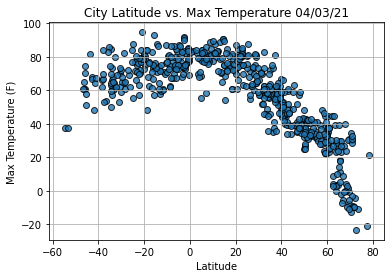

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

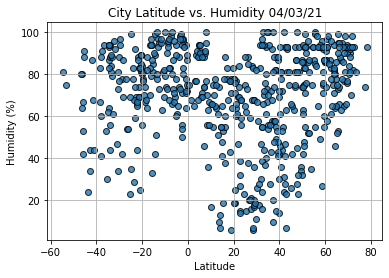

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

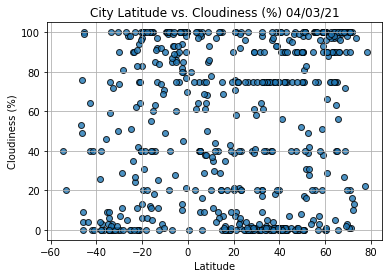

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

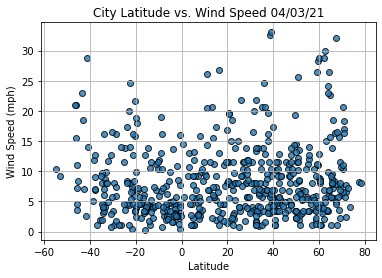

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [19]:
index13 = city_data_df.loc[13]
index13

City                       Yuzawa
Country                        JP
Date          2021-04-04 02:30:39
Lat                       39.1667
Lng                         140.5
Max Temp                     55.4
Humidity                       87
Cloudiness                     75
Wind Speed                   4.61
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2021-04-04 02:30:38,35.1333,140.3000,72.00,56,75,20.71
1,Hofn,IS,2021-04-04 02:30:38,64.2539,-15.2082,28.22,64,5,26.51
4,Marstal,DK,2021-04-04 02:30:39,54.8562,10.5173,35.60,93,5,5.75
5,Havre-Saint-Pierre,CA,2021-04-04 02:30:39,50.2334,-63.5986,26.60,63,90,8.05
6,Trincomalee,LK,2021-04-04 02:30:40,8.5711,81.2335,81.66,63,100,9.84


In [21]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

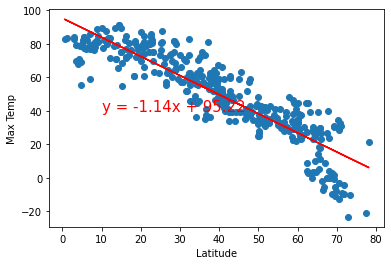

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

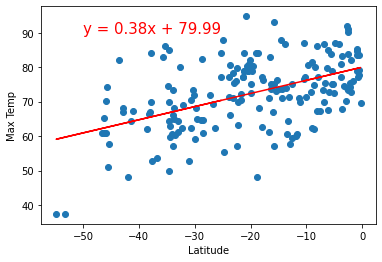

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

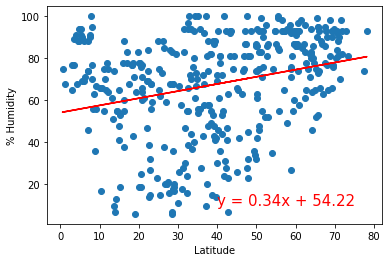

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

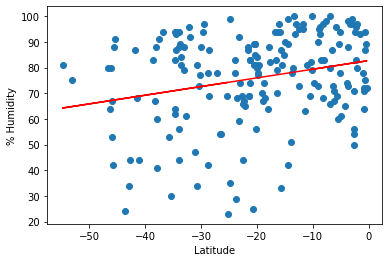

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

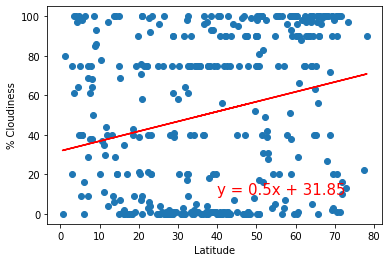

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

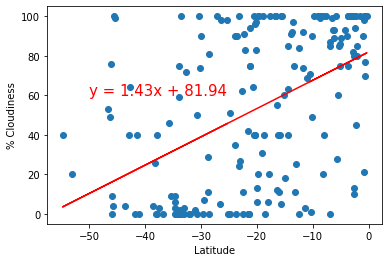

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

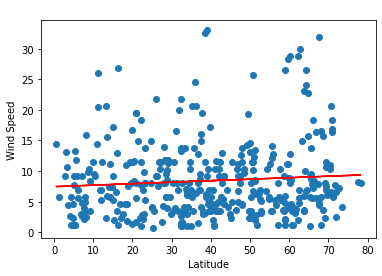

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

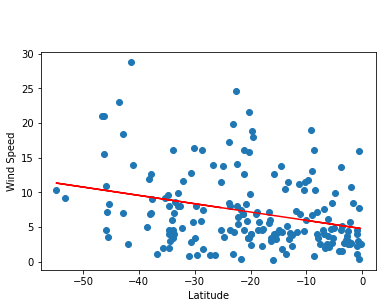

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))